# Sreekethanagunuru_healthcare


# **Loading the Dataset and Libraries**

**Mounting Google Drive**

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


**Loading the Dataset**

In [3]:
healthdata = pd.read_csv("Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015_20240422.csv")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16812\2785752573.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  healthdata = pd.read_csv("Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015_20240422.csv")


**Original Shape of the dataset**

In [4]:
healthdata.shape

(2346931, 34)

**Dataset basic info**

In [5]:
healthdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346931 entries, 0 to 2346930
Data columns (total 34 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Health Service Area                  object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Facility Id                          float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCS Diagnosis Code                   int64  
 15  CCS Diagnosis Description       

**Display the dataset**

In [6]:
display(healthdata)

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,5333.90,4818.42
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,NaN,NaN,0,N,Y,4865.99,4588.78
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,5901.54,5559.56
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,NaN,NaN,0,N,Y,3619.08,3567.25
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Blue Cross/Blue Shield,Private Health Insurance,0,N,Y,3185.87,3167.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346926,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Medicare,Private Health Insurance,0,N,Y,43494.00,5588.26
2346927,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,50 to 69,117,M,White,Not Span/Hispanic,...,Minor,Medical,Private Health Insurance,NaN,NaN,0,N,Y,16662.00,2907.62
2346928,NaN,NaN,NaN,NaN,Redacted for Confidentiality,50 to 69,NaN,M,White,Unknown,...,Minor,Medical,Medicaid,NaN,NaN,0,N,N,7142.00,1692.55
2346929,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Medicare,Blue Cross/Blue Shield,0,N,Y,13070.00,2447.75


**Data types of the columns**

In [7]:
healthdata.dtypes

Health Service Area                     object
Hospital County                         object
Operating Certificate Number           float64
Facility Id                            float64
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                       int64
CCS Diagnosis Description               object
CCS Procedure Code                       int64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Descr

**Descriptive Statistics**

In [8]:
healthdata.describe()

,Operating Certificate Number,Facility Id,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Birth Weight,Total Charges,Total Costs
count,2.341467e+06,2.341467e+06,2346931.0,2.346931e+06,2.346931e+06,2.346931e+06,2.346931e+06,2.346931e+06,2.346931e+06,2.346931e+06,2.346931e+06
mean,5.007219e+06,1.043369e+03,2015.0,1.905617e+02,1.127634e+02,4.181795e+02,1.043054e+01,2.010577e+00,3.223480e+02,4.321481e+04,1.473254e+04
std,2.259649e+06,7.133684e+02,0.0,1.596361e+02,8.892976e+01,2.413585e+02,5.924058e+00,8.974118e-01,9.842375e+02,8.046009e+04,2.819890e+04
min,1.010000e+05,1.000000e+00,2015.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00
25%,2.951001e+06,5.410000e+02,2015.0,1.060000e+02,0.000000e+00,2.010000e+02,5.000000e+00,1.000000e+00,0.000000e+00,1.202861e+04,4.410150e+03
50%,5.907001e+06,1.099000e+03,2015.0,1.590000e+02,1.320000e+02,3.830000e+02,9.000000e+00,2.000000e+00,0.000000e+00,2.348637e+04,8.191270e+03
75%,7.002012e+06,1.450000e+03,2015.0,2.180000e+02,2.160000e+02,6.400000e+02,1.500000e+01,3.000000e+00,0.000000e+00,4.661670e+04,1.577182e+04
max,7.004010e+06,9.431000e+03,2015.0,9.170000e+02,9.990000e+02,9.560000e+02,2.500000e+01,4.000000e+00,9.000000e+03,7.248391e+06,3.007713e+06


# **Data Preprocessing**

**Missing Values Count**

In [9]:
missing_values = healthdata.isna().sum()
print(missing_values)

Health Service Area                       5464
Hospital County                           5464
Operating Certificate Number              5464
Facility Id                               5464
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                      35816
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCS Diagnosis Code                           0
CCS Diagnosis Description                    0
CCS Procedure Code                           0
CCS Procedure Description                    0
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Descr

**Missing value percentage wise in each column**

In [10]:
missing_percentage = (healthdata.isnull().sum() / len(healthdata)) * 100
print(missing_percentage)


Health Service Area                     0.232815
Hospital County                         0.232815
Operating Certificate Number            0.232815
Facility Id                             0.232815
Facility Name                           0.000000
Age Group                               0.000000
Zip Code - 3 digits                     1.526078
Gender                                  0.000000
Race                                    0.000000
Ethnicity                               0.000000
Length of Stay                          0.000000
Type of Admission                       0.000000
Patient Disposition                     0.000000
Discharge Year                          0.000000
CCS Diagnosis Code                      0.000000
CCS Diagnosis Description               0.000000
CCS Procedure Code                      0.000000
CCS Procedure Description               0.000000
APR DRG Code                            0.000000
APR DRG Description                     0.000000
APR MDC Code        

**Drop Columns with Most Missing Values**

In [11]:
healthdata = healthdata.drop(['Payment Typology 2','Payment Typology 3'], axis=1)


In [12]:
cleaned_healthdata = healthdata.dropna(subset=['APR Severity of Illness Description', 'APR Risk of Mortality','Zip Code - 3 digits','Facility Id'])


Updated Shape of the dataset

In [13]:
cleaned_healthdata.shape

(2311006, 32)

**Manipulating the data columns by removing symbols like things**

In [14]:
cleaned_healthdata['Length of Stay'] = cleaned_healthdata['Length of Stay'].apply(lambda x: str(x).split(' ')[0])
cleaned_healthdata['Length of Stay'] = pd.to_numeric(cleaned_healthdata['Length of Stay'])
cleaned_healthdata['Total Costs'] = cleaned_healthdata['Total Costs'].apply(lambda x: str(x).replace('$',''))
cleaned_healthdata['Total Costs'] = pd.to_numeric(cleaned_healthdata['Total Costs'])
cleaned_healthdata['Total Charges'] = cleaned_healthdata['Total Charges'].apply(lambda x: str(x).replace('$',''))
cleaned_healthdata['Total Charges'] = pd.to_numeric(cleaned_healthdata['Total Charges'])

cleaned_healthdata['Zip Code - 3 digits'] = cleaned_healthdata['Zip Code - 3 digits'].apply(lambda x: str(x).replace('OOS','999'))
cleaned_healthdata['Zip Code - 3 digits'] = pd.to_numeric(cleaned_healthdata['Zip Code - 3 digits'])
display(cleaned_healthdata)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16812\1330305449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_healthdata['Length of Stay'] = cleaned_healthdata['Length of Stay'].apply(lambda x: str(x).split(' ')[0])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16812\1330305449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_healthdata['Length of Stay'] = pd.to_numeric(cleaned_healthdata['Length of Stay'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16812\1330305449.py:3: SettingWith

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,2,Moderate,Minor,Medical,Medicare,0,N,Y,5333.90,4818.42
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,2,Moderate,Moderate,Medical,Medicare,0,N,Y,4865.99,4588.78
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,1,Minor,Minor,Medical,Medicare,0,N,Y,5901.54,5559.56
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,...,2,Moderate,Minor,Medical,Medicare,0,N,Y,3619.08,3567.25
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,M,White,Not Span/Hispanic,...,1,Minor,Moderate,Medical,Medicare,0,N,Y,3185.87,3167.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346925,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,F,White,Not Span/Hispanic,...,3,Major,Major,Medical,Medicare,0,N,Y,18847.00,3391.16
2346926,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,M,White,Not Span/Hispanic,...,2,Moderate,Moderate,Medical,Medicare,0,N,Y,43494.00,5588.26
2346927,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,50 to 69,117,M,White,Not Span/Hispanic,...,1,Minor,Minor,Medical,Private Health Insurance,0,N,Y,16662.00,2907.62
2346929,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,M,White,Not Span/Hispanic,...,1,Minor,Moderate,Medical,Medicare,0,N,Y,13070.00,2447.75


In [15]:
cleaned_healthdata.columns

Index(['Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility Id', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Payment Typology 1', 'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

In [16]:
for column in cleaned_healthdata.columns:
    unique_values = cleaned_healthdata[column].unique()
    print(f"Unique values in column '{column}': {unique_values}\n")

Unique values in column 'Health Service Area': ['Western NY' 'Finger Lakes' 'Capital/Adirond' 'Central NY'
 'Southern Tier' 'Hudson Valley' 'New York City' 'Long Island']

Unique values in column 'Hospital County': ['Allegany' 'Cattaraugus' 'Chautauqua' 'Erie' 'Niagara' 'Genesee'
 'Chemung' 'Orleans' 'Wyoming' 'Monroe' 'Albany' 'Livingston' 'Ontario'
 'Wayne' 'Schuyler' 'Steuben' 'Cayuga' 'Yates' 'Oswego' 'Broome'
 'Cortland' 'Jefferson' 'Oneida' 'Chenango' 'Herkimer' 'Onondaga'
 'Madison' 'Lewis' 'St Lawrence' 'Tompkins' 'Columbia' 'Fulton'
 'Montgomery' 'Otsego' 'Rensselaer' 'Saratoga' 'Clinton' 'Schenectady'
 'Delaware' 'Franklin' 'Essex' 'Warren' 'Dutchess' 'Orange' 'Schoharie'
 'Putnam' 'Rockland' 'Sullivan' 'Ulster' 'Westchester' 'Bronx' 'Kings'
 'Manhattan' 'Queens' 'Richmond' 'Suffolk' 'Nassau']

Unique values in column 'Operating Certificate Number': [ 226700.  228000.  401001.  427000. 1401014. 1401005.  601000.  602001.
  632000. 1401008. 1404000. 3102000. 1401013. 1401010. 


 70 or Older    27.652373
50 to 69       27.528098
30 to 49       19.393978
0 to 17        15.025751
18 to 29       10.399800
Name: Age Group, dtype: float64

 F    55.755545
M    44.243979
U     0.000476
Name: Gender, dtype: float64

 White                     57.223434
Other Race                23.070213
Black/African American    18.790432
Multi-racial               0.915921
Name: Race, dtype: float64

 Not Span/Hispanic    83.556642
Spanish/Hispanic     11.743457
Unknown               4.353256
Multi-ethnic          0.346646
Name: Ethnicity, dtype: float64


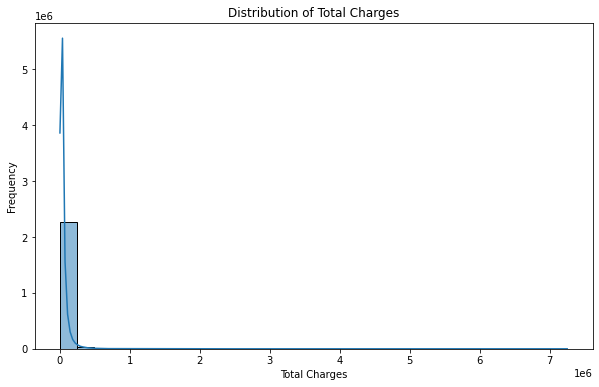

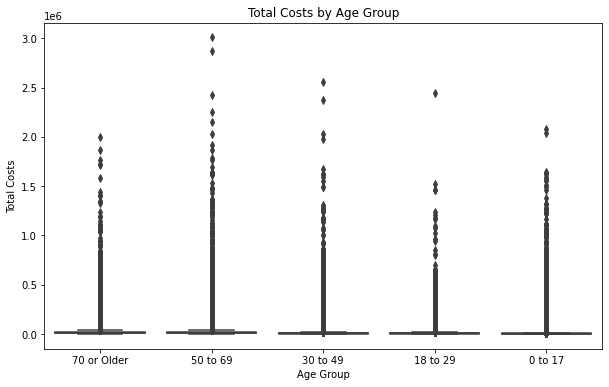

In [17]:
categorical_columns = ['Age Group', 'Gender', 'Race', 'Ethnicity']

# Counts and percentages for categorical columns
for column in categorical_columns:
    print("\n", cleaned_healthdata[column].value_counts(normalize=True) * 100)

# Visualizations
# Histogram of 'Total Charges'
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_healthdata, x='Total Charges', bins=30, kde=True)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

# Box plot of 'Total Costs' by 'Age Group'
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_healthdata, x='Age Group', y='Total Costs')
plt.title('Total Costs by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Costs')
plt.show()

# **Exploratory Data Analysis**

## **Histogram for each of the columns**

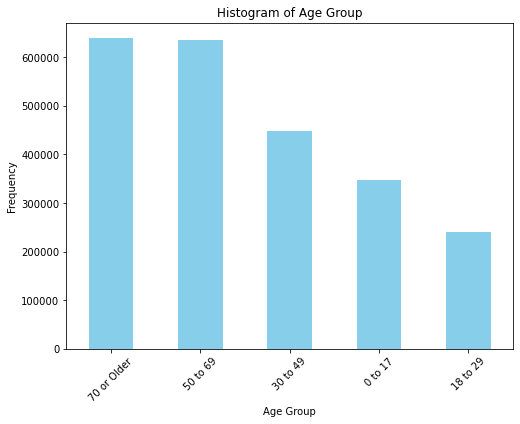

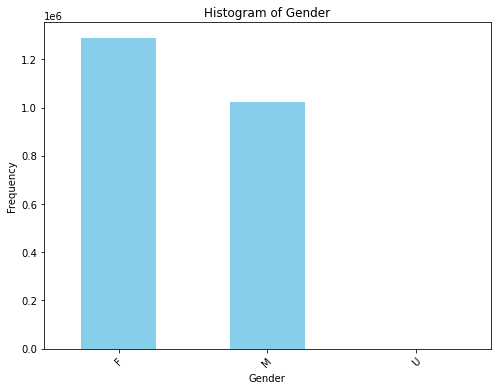

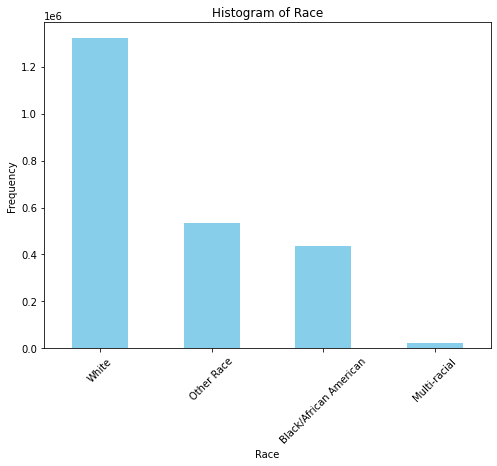

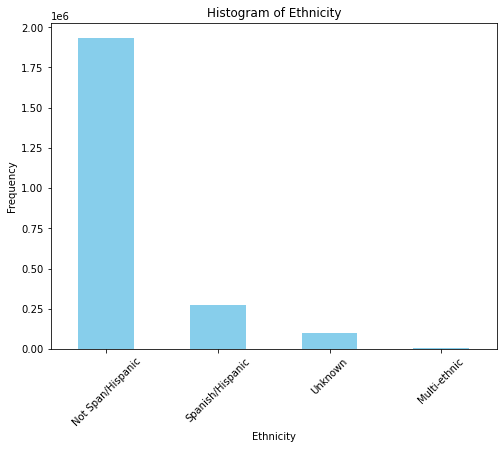

In [18]:
# Define categorical columns
categorical_columns = ['Age Group', 'Gender', 'Race', 'Ethnicity']

# Plot histograms for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    cleaned_healthdata[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

## **Length of Stay & Birth weight Skewed distributions**

**Data Distribution of Length of Stay column**

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


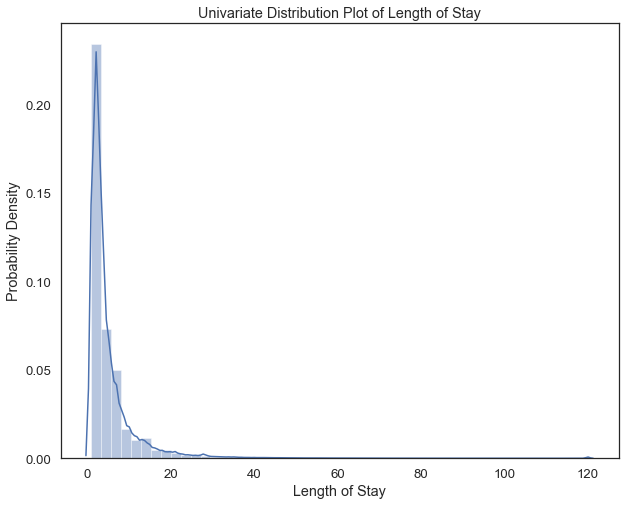

In [19]:
# Assuming 'Length of Stay' is the column name
data_cleaned = cleaned_healthdata[cleaned_healthdata['Length of Stay'] != '120 +']

sns.set(font_scale=1.2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(10, 8))
sns.distplot(data_cleaned['Length of Stay'], norm_hist=False);
plt.ylabel('Probability Density')
plt.title('Univariate Distribution Plot of Length of Stay')
plt.show()

**Data Distribution of Birth Weights column**

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


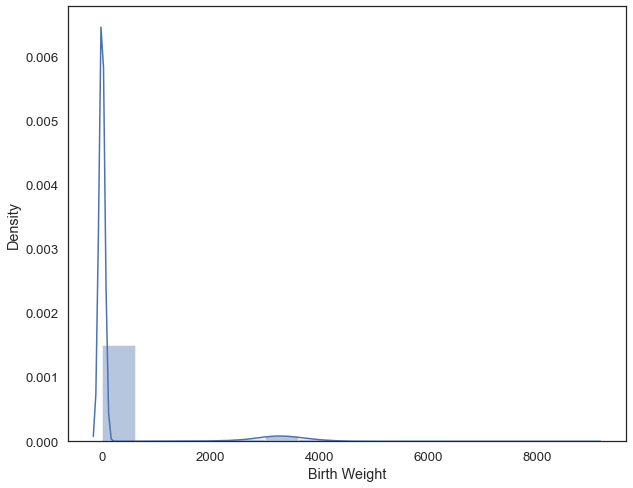

In [20]:
f, ax = plt.subplots(figsize=(10, 8))
sns.distplot(cleaned_healthdata['Birth Weight'], bins=15);

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16812\316722096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birth_youngest_stay['Birth Weight'] = birth_youngest_stay['Birth Weight'].apply(lambda x: float(x/454))


<AxesSubplot:xlabel='Birth Weight', ylabel='Length of Stay'>

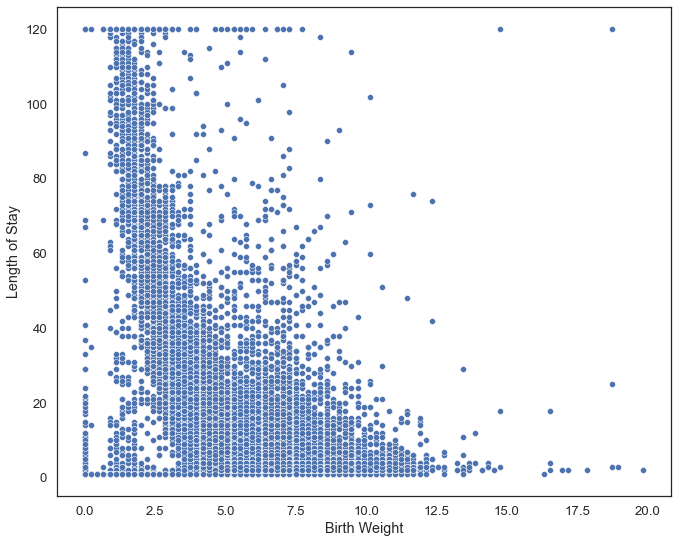

In [21]:
birth_youngest_stay = cleaned_healthdata[cleaned_healthdata['Type of Admission'].str.contains('Newborn')]
birth_youngest_stay['Birth Weight'] = birth_youngest_stay['Birth Weight'].apply(lambda x: float(x/454))
f, ax = plt.subplots(figsize=(11, 9))
sns.scatterplot(x="Birth Weight", y="Length of Stay",data=birth_youngest_stay)

**Both the data distribution of Birth Weights and Length of Stay are right skewed. That is they have data records for small values but not larger values.**

## **Exploring Distribution of other attributes with respect to Length of Stay**

**Length of Stay vs Gender for each Race**

<AxesSubplot:xlabel='Gender', ylabel='Length of Stay'>

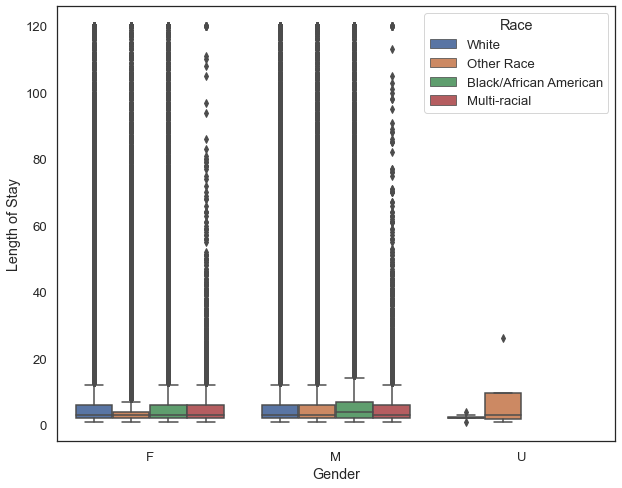

In [22]:
f, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x="Gender", y="Length of Stay",hue="Race",data=cleaned_healthdata)

**Length of Stay vs Severity of illness**

<ipython-input-30-3b0c78cc29c6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="APR Severity of Illness Description", y="Length of Stay",


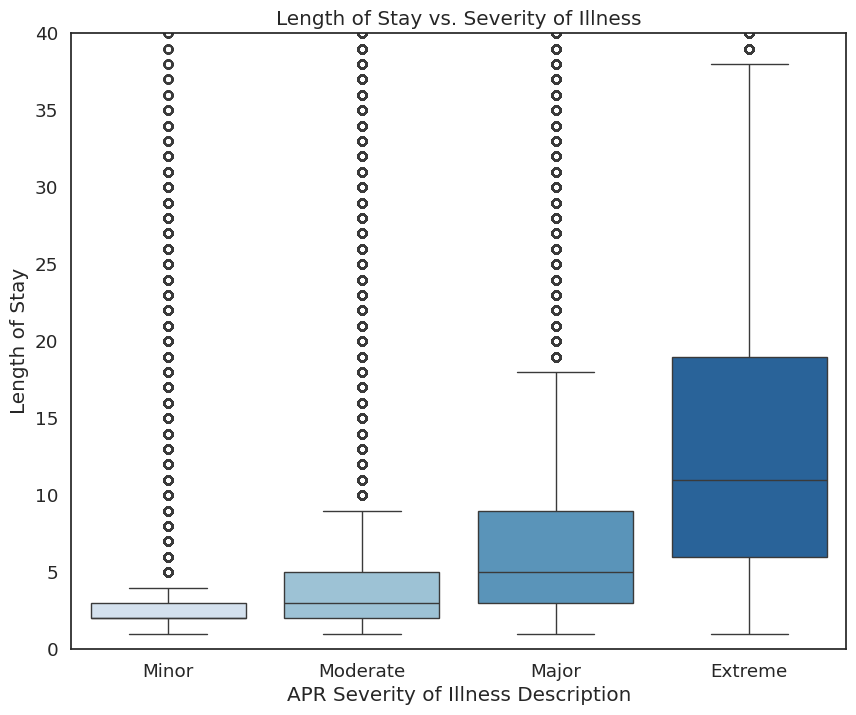

In [30]:
f, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="APR Severity of Illness Description", y="Length of Stay",
            order=['Minor', 'Moderate', 'Major', 'Extreme'], data=cleaned_healthdata, palette='Blues')
ax.set(ylim=(0, 40))
plt.title('Length of Stay vs. Severity of Illness')
plt.show()


**Type of admission vs length of stay**

<ipython-input-31-0aa2b2bae657>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type of Admission', y = "Length of Stay" , data = cleaned_healthdata, palette='Set2')


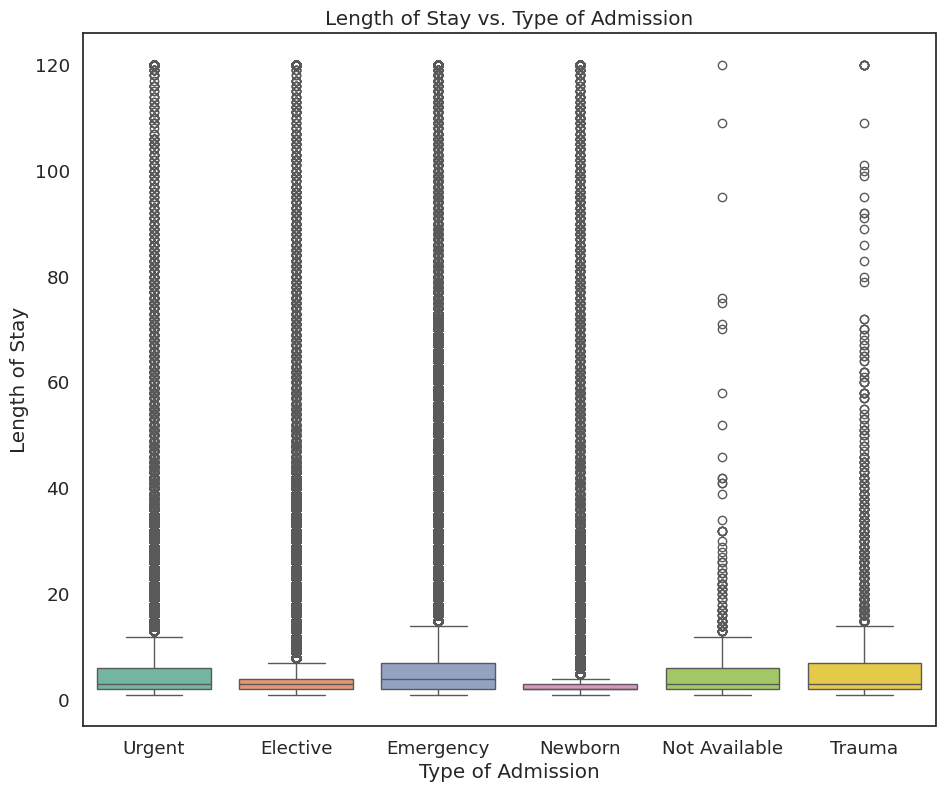

In [31]:
#distribution of Type of admission and length of stay
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x='Type of Admission', y = "Length of Stay" , data = cleaned_healthdata, palette='Set2')
plt.title('Length of Stay vs. Type of Admission')
plt.show()

**Length of Stay vs Age Group**

<ipython-input-32-7530fc875731>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Age Group", y="Length of Stay", order=['0 to 17','18 to 29','30 to 49','50 to 69','70 or Older'],


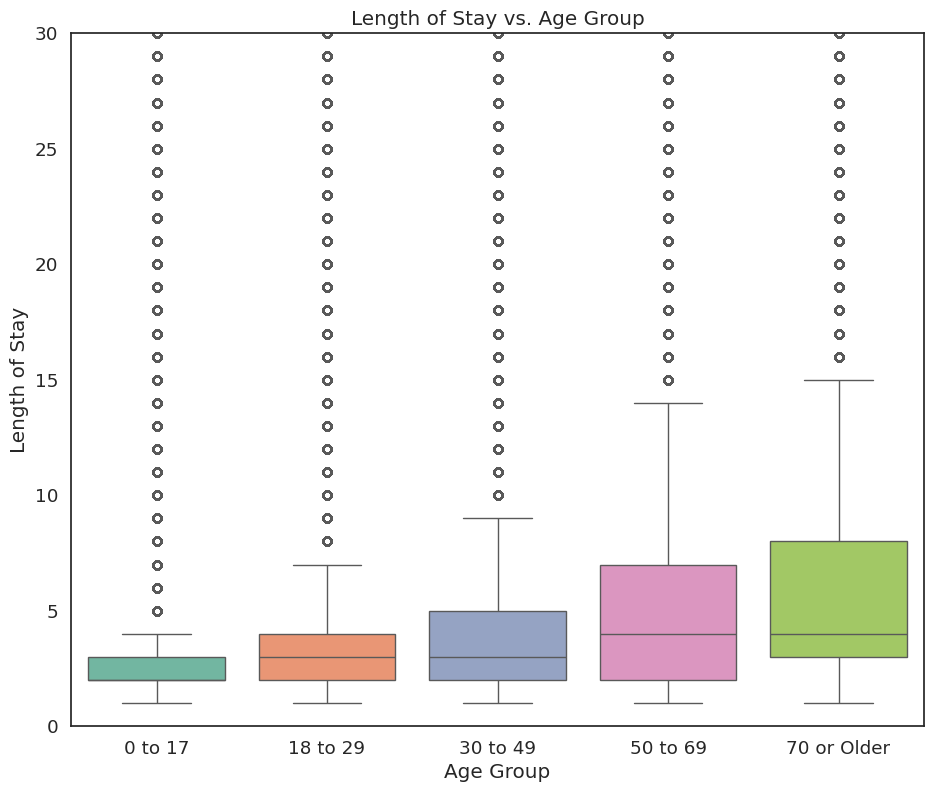

In [32]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Age Group", y="Length of Stay", order=['0 to 17','18 to 29','30 to 49','50 to 69','70 or Older'],
            palette="Set2", data=cleaned_healthdata)
ax.set(ylim=(0, 30))
plt.title('Length of Stay vs. Age Group')
plt.show()

**Length of Stay vs Patient Race**

<ipython-input-33-1f87a8af2de8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Race", y="Length of Stay", data=cleaned_healthdata, palette='Set2')


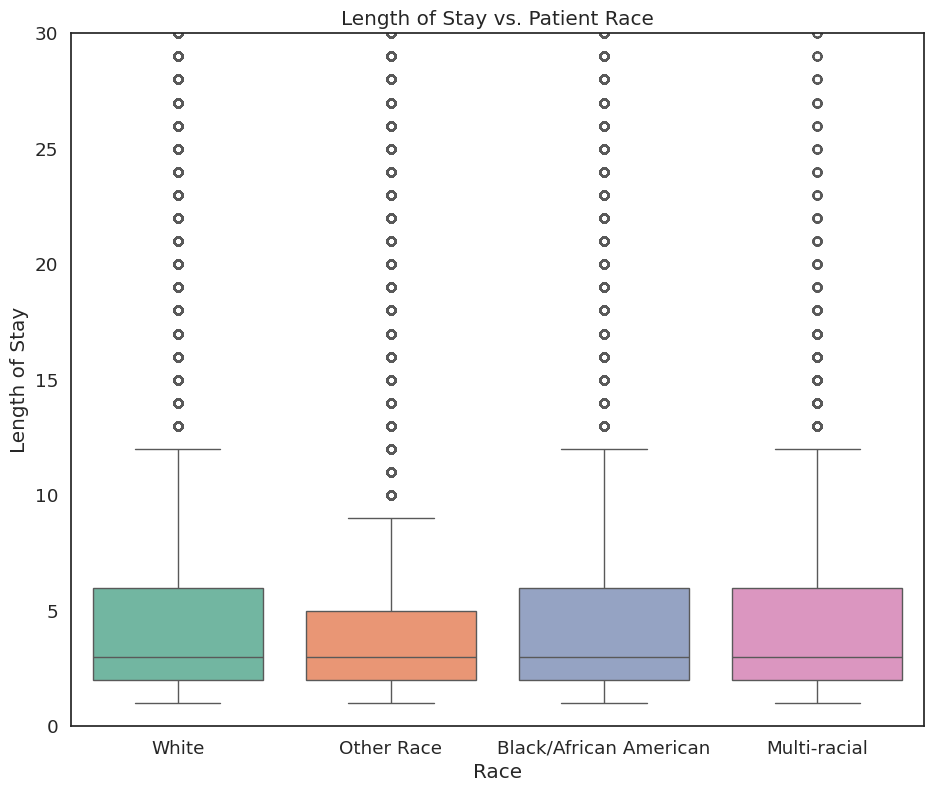

In [33]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Race", y="Length of Stay", data=cleaned_healthdata, palette='Set2')
plt.title('Length of Stay vs. Patient Race')
ax.set(ylim=(0, 30))
plt.show()

**Length of stay - 120+**

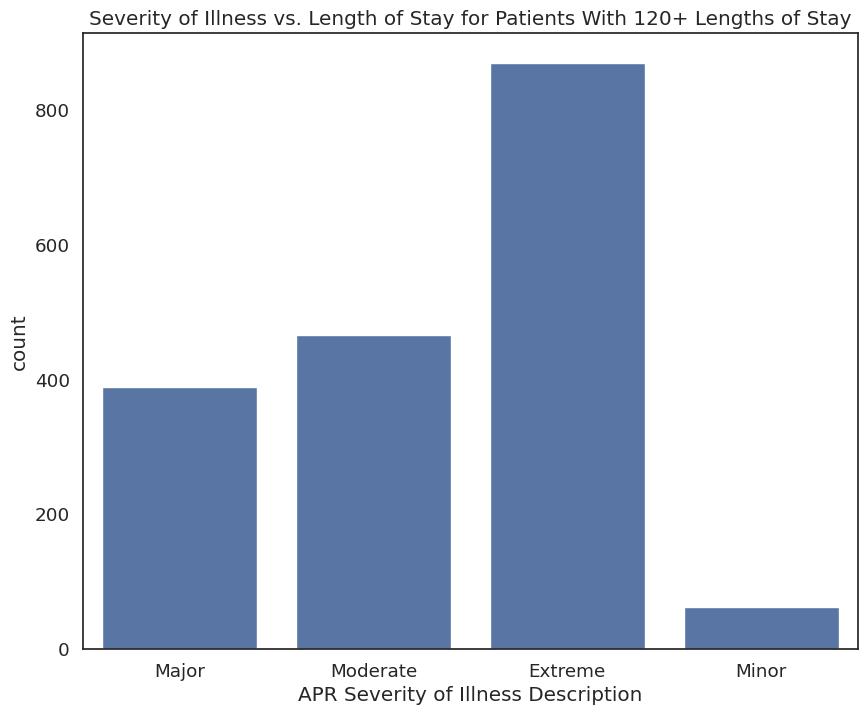

In [34]:
f, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x='APR Severity of Illness Description', data = cleaned_healthdata[cleaned_healthdata['Length of Stay']==120])
plt.title('Severity of Illness vs. Length of Stay for Patients With 120+ Lengths of Stay')
plt.show()

## **Illness Type**

**Illness with most to least number of days to stay**

In [35]:
diagnosis_stay_data = cleaned_healthdata[['CCS Diagnosis Description','Length of Stay']].groupby('CCS Diagnosis Description', as_index=False).mean()
diagnosis_stay_data = diagnosis_stay_data.sort_values(by='Length of Stay', ascending=False, ignore_index=True)
display(diagnosis_stay_data)

,CCS Diagnosis Description,Length of Stay
0,Short gestation; low birth weight; and fetal g...,31.268293
1,Respiratory distress syndrome,23.423581
2,Tuberculosis,21.670732
3,Leukemias,19.802878
4,Schizophrenia and other psychotic disorders,17.177129
...,...,...
254,Nonspecific chest pain,2.086558
255,Medical examination/evaluation,1.874636
256,Acute and chronic tonsillitis,1.870349
257,Prolapse of female genital organs,1.688921


**Top 5 Diagnoses with Longest Average Length of Stay**

<ipython-input-36-478fb3d1ca51>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="CCS Diagnosis Description", x="Length of Stay", data=diagnosis_stay_data[0:5], palette='Set2')


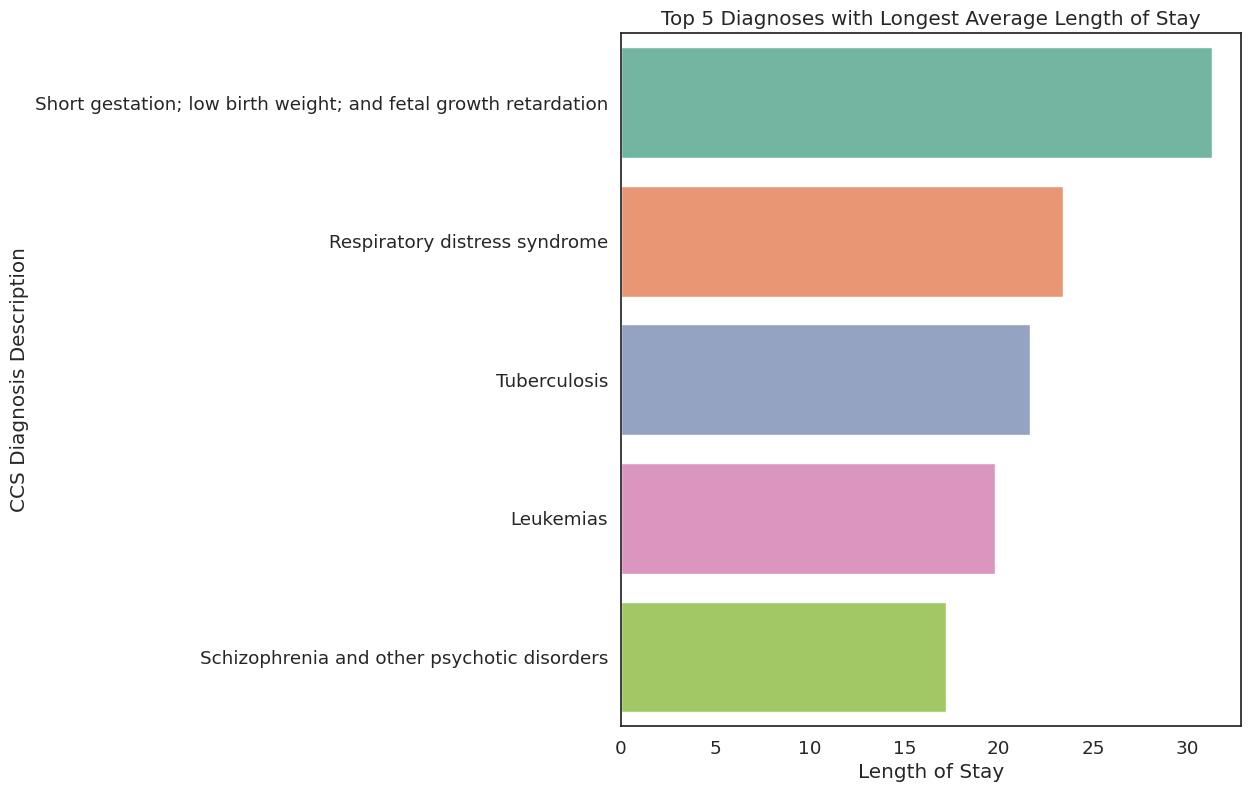

In [36]:
sns.set(font_scale=1.2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 9))
sns.barplot(y="CCS Diagnosis Description", x="Length of Stay", data=diagnosis_stay_data[0:5], palette='Set2')
plt.title('Top 5 Diagnoses with Longest Average Length of Stay')
plt.show()

**Diagnosis in descending order of costs**

In [37]:
diagnosis_costs_data = cleaned_healthdata[['CCS Diagnosis Description','Total Costs']].groupby('CCS Diagnosis Description', as_index=False).mean()
diagnosis_costs_data = diagnosis_costs_data.sort_values(by='Total Costs', ascending=False, ignore_index=True)
display(diagnosis_costs_data)

,CCS Diagnosis Description,Total Costs
0,Leukemias,76951.367574
1,Short gestation; low birth weight; and fetal g...,67843.720537
2,Heart valve disorders,55756.266929
3,Respiratory distress syndrome,54879.051703
4,Hodgkin`s disease,52965.968158
...,...,...
254,OB-related trauma to perineum and vulva,5763.449082
255,Other pregnancy and delivery including normal,5746.065503
256,Adjustment disorders,5301.033465
257,Medical examination/evaluation,4230.319913


use of an inner join, let's see how the diagnosis descriptions that cost the most compare with their length of stay

**Combined rank of diagnosis descending on the length of stay with costs index**

In [38]:
#Rank the total costs and then do an inner join
diagnosis_costs_data = diagnosis_costs_data.reset_index()
joined_data = diagnosis_stay_data.merge(right=diagnosis_costs_data, how='inner', on='CCS Diagnosis Description')
display(joined_data)

,CCS Diagnosis Description,Length of Stay,index,Total Costs
0,Short gestation; low birth weight; and fetal g...,31.268293,1,67843.720537
1,Respiratory distress syndrome,23.423581,3,54879.051703
2,Tuberculosis,21.670732,5,52425.569553
3,Leukemias,19.802878,0,76951.367574
4,Schizophrenia and other psychotic disorders,17.177129,97,18082.769376
...,...,...,...,...
254,Nonspecific chest pain,2.086558,250,6526.271396
255,Medical examination/evaluation,1.874636,257,4230.319913
256,Acute and chronic tonsillitis,1.870349,249,6529.424414
257,Prolapse of female genital organs,1.688921,174,11350.399444


 there is definitely a strong relationship between the most expensive diagnoses and a longer inpatient length of stay. However, for example, the diagnosis description with the second longest average length of stay is only the fifth most expensive to the hospital

see another feature that has a significant amount of variance in length of stay across its categories. Medicare patients tend to have one of the longest length of stays. This may be because most medicare patients are in an older age bracket. Let's see if we can visually support this hypothesis

## **Payment Type**

**Choice of Payment mode**

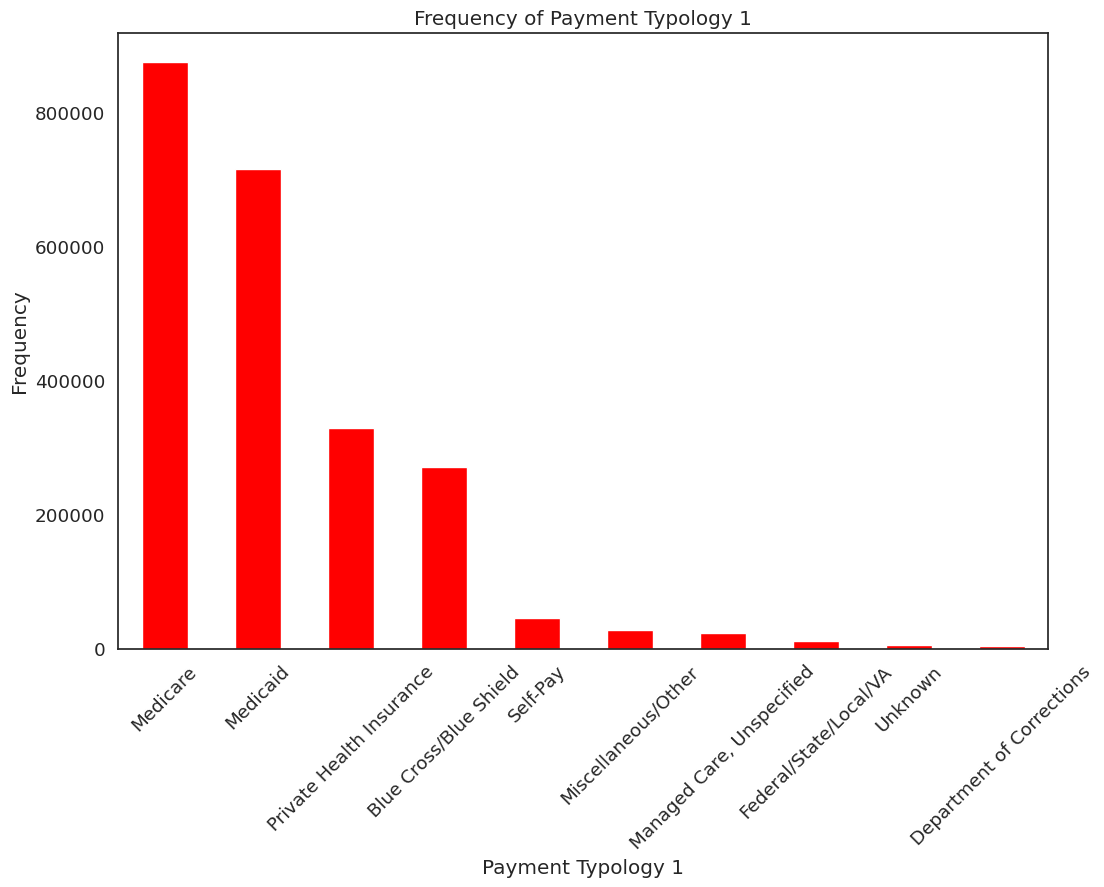

In [39]:
# Plot bar plot for the 'Payment Typology 1' column
plt.figure(figsize=(12, 8))  # Increase figure size for better readability
ax = cleaned_healthdata['Payment Typology 1'].value_counts().plot(kind='bar', color='red')
plt.title('Frequency of Payment Typology 1')
plt.xlabel('Payment Typology 1')
plt.ylabel('Frequency')

# Rotate x-axis labels further
ax.tick_params(axis='x', rotation=45)

plt.show()

**Payment Choice for each age Group**

<ipython-input-40-c6d67093da93>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age Group', data = cleaned_healthdata[cleaned_healthdata['Payment Typology 1']=='Medicare'], order=['0 to 17','18 to 29','30 to 49','50 to 69','70 or Older'], palette='Set2')


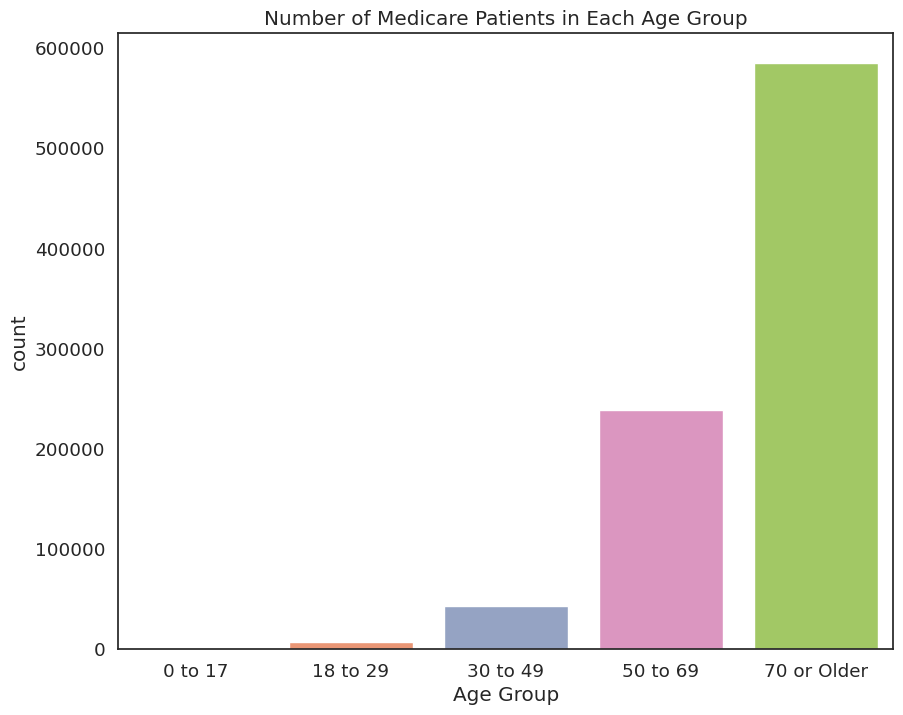

In [40]:
f, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x='Age Group', data = cleaned_healthdata[cleaned_healthdata['Payment Typology 1']=='Medicare'], order=['0 to 17','18 to 29','30 to 49','50 to 69','70 or Older'], palette='Set2')
plt.title('Number of Medicare Patients in Each Age Group')
plt.show()


# **Question 1**

**1.	What is the distribution of patient age groups across various health service areas within New York State, and are there any notable variations?**

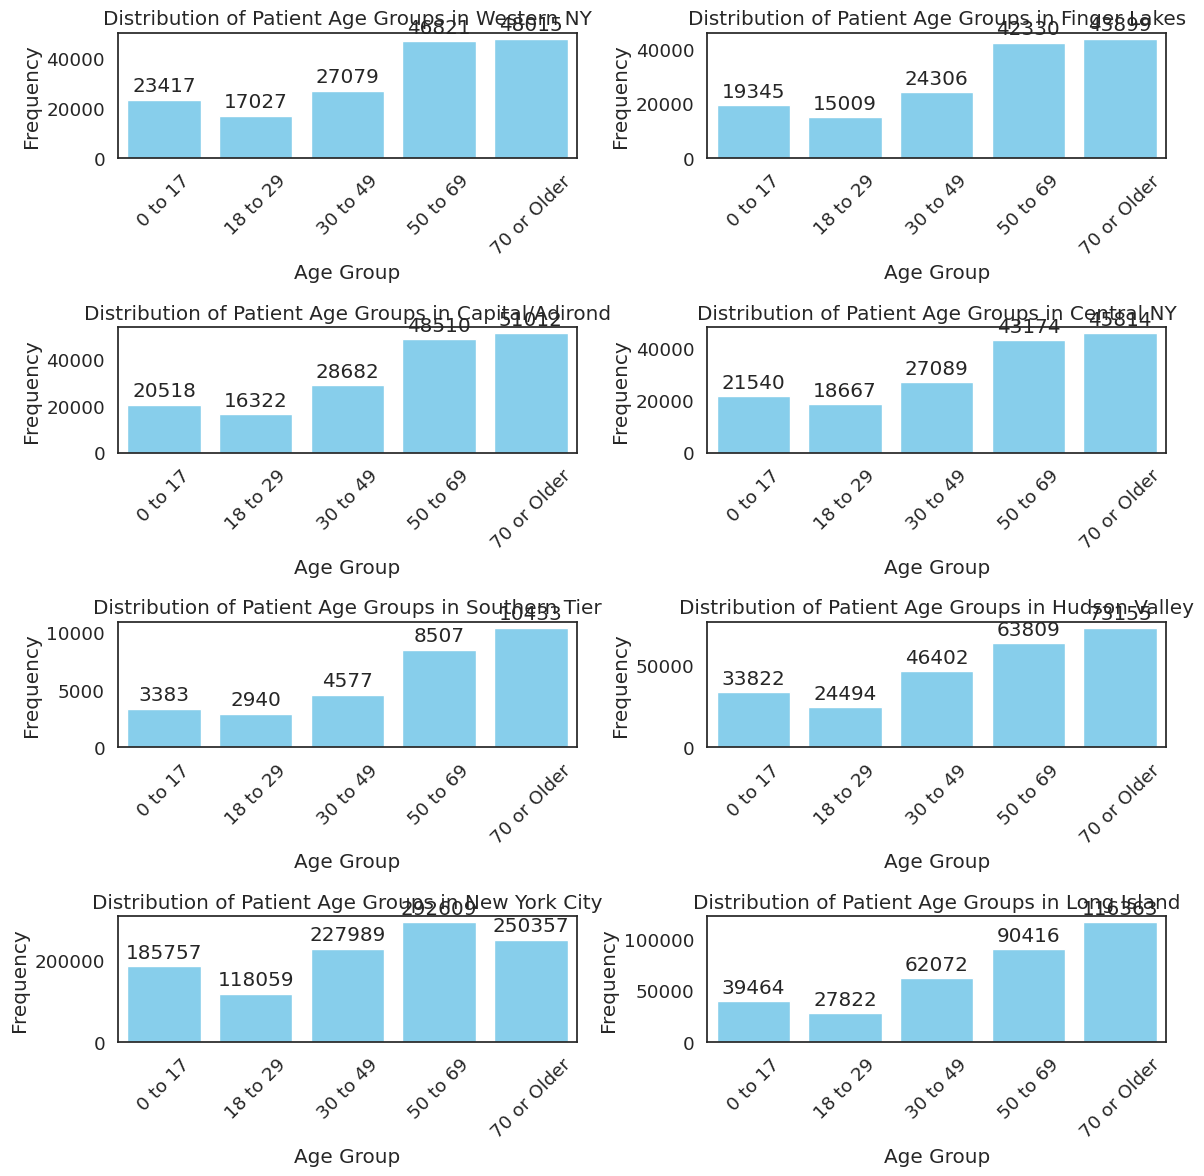

In [41]:
# Define the unique health service areas in New York
health_service_areas = ['Western NY', 'Finger Lakes', 'Capital/Adirond', 'Central NY',
                       'Southern Tier', 'Hudson Valley', 'New York City', 'Long Island']

# Create separate histograms for each health service area
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))  # 4 rows and 2 columns of subplots
axes = axes.flatten()  # Flatten the array for easy indexing

for i, area in enumerate(health_service_areas):
    ax = axes[i]  # Select the current subplot
    data_area = cleaned_healthdata[cleaned_healthdata['Health Service Area'] == area]
    age_group_counts = data_area['Age Group'].value_counts().sort_index()
    bars = ax.bar(age_group_counts.index, age_group_counts.values, color='skyblue')
    ax.set_title(f'Distribution of Patient Age Groups in {area}')
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Frequency')
    ax.set_xlim(-0.5, 4.5)  # Set x-axis limits to ensure uniform sequence
    ax.set_ylim(0, None)  # Set y-axis lower limit to 0 for consistency
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    # Add labels to each bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',  # Label text
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Position of label
                    xytext=(0, 3),  # Offset of label from its position
                    textcoords="offset points",
                    ha='center', va='bottom')  # Horizontal and vertical alignment of label

# Hide empty subplots if there are any
for ax in axes[len(health_service_areas):]:
    ax.axis('off')

plt.tight_layout()  # Adjust layout to prevent overlap of subplots
plt.show()

In [42]:
# Create a dictionary to store age group counts for each health service area
age_group_counts_dict = {}

# Iterate over each health service area
for area in health_service_areas:
    data_area = cleaned_healthdata[cleaned_healthdata['Health Service Area'] == area]
    age_group_counts = data_area['Age Group'].value_counts().sort_index()
    age_group_counts_dict[area] = age_group_counts

# Create a DataFrame from the dictionary
age_group_counts_df = pd.DataFrame(age_group_counts_dict)

# Fill missing values with zeros and convert index to string for consistency
age_group_counts_df = age_group_counts_df.fillna(0).astype(int).astype(str)
age_group_counts_df

,Western NY,Finger Lakes,Capital/Adirond,Central NY,Southern Tier,Hudson Valley,New York City,Long Island
Age Group,,,,,,,,
0 to 17,23417,19345,20518,21540,3383,33822,185757,39464
18 to 29,17027,15009,16322,18667,2940,24494,118059,27822
30 to 49,27079,24306,28682,27089,4577,46402,227989,62072
50 to 69,46821,42330,48510,43174,8507,63809,292609,90416
70 or Older,48015,43899,51012,45814,10433,73155,250357,116363


In [43]:
# Create a dictionary to store age group counts and percentages for each health service area
age_group_counts_percent_dict = {}

# Iterate over each health service area
for area in health_service_areas:
    data_area = cleaned_healthdata[cleaned_healthdata['Health Service Area'] == area]
    age_group_counts = data_area['Age Group'].value_counts().sort_index()
    total_patients = age_group_counts.sum()
    age_group_percentages = (age_group_counts / total_patients) * 100
    age_group_counts_percent_dict[area] = age_group_percentages

# Create a DataFrame from the dictionary
age_group_counts_percent_df = pd.DataFrame(age_group_counts_percent_dict)

# Fill missing values with zeros and convert index to string for consistency
age_group_counts_percent_df = age_group_counts_percent_df.fillna(0).astype(float)

age_group_counts_percent_df

,Western NY,Finger Lakes,Capital/Adirond,Central NY,Southern Tier,Hudson Valley,New York City,Long Island
Age Group,,,,,,,,
0 to 17,14.422976,13.351600,12.431836,13.782601,11.337131,13.994422,17.283403,11.740451
18 to 29,10.487254,10.358964,9.889484,11.944281,9.852547,10.134805,10.984573,8.276982
30 to 49,16.678472,16.775601,17.378396,17.333188,15.338472,19.199609,21.212798,18.466280
50 to 69,28.837946,29.215468,29.392162,27.625349,28.508713,26.402049,27.225241,26.898556
70 or Older,29.573353,30.298366,30.908121,29.314581,34.963137,30.269114,23.293985,34.617730


**Variations Across Health Service Areas:**

	Urban areas such as New York City and Long Island tend to have higher numbers of patients across all age groups. This is because of the larger population size and better infrastructure facilities.

	Rural areas, such as the Southern Tier and Central NY, have lower numbers of patients across most age groups, reflecting potentially smaller populations and healthcare resource availability.


# **Question-2 Correlation Between Length of Stay and Total Costs**

## **slope of correlation**

<Axes: xlabel='Length of Stay', ylabel='Total Costs'>

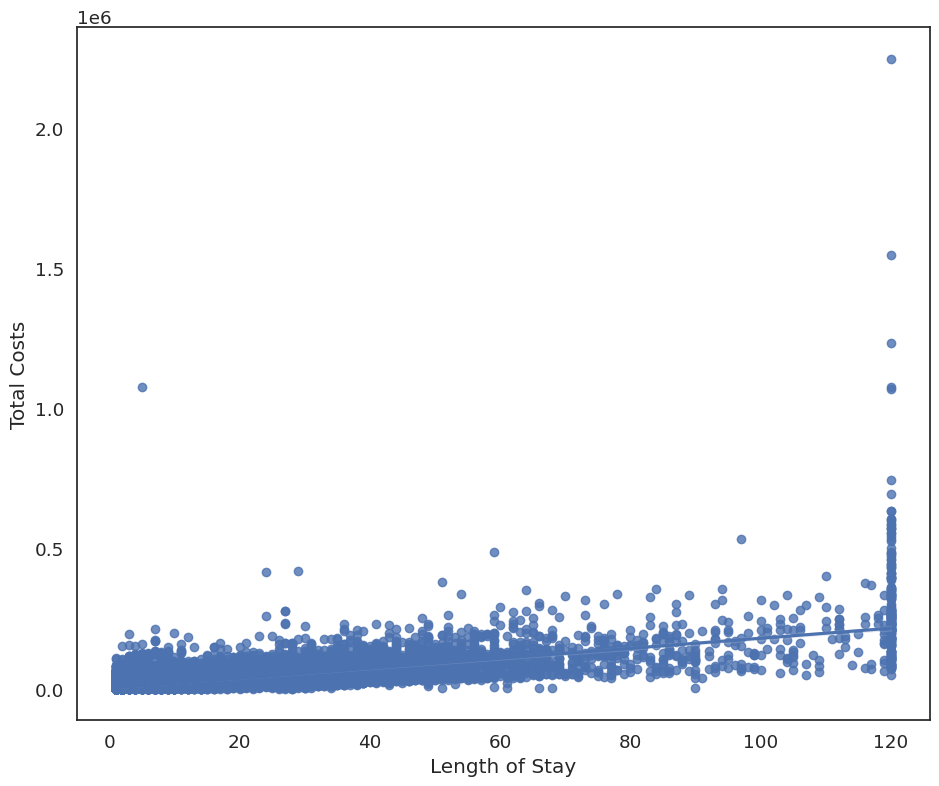

In [44]:
f, ax = plt.subplots(figsize=(11, 9))
sns.regplot(x="Length of Stay", y="Total Costs",data=cleaned_healthdata[0:200000])


In [45]:
length_of_stay_counts = cleaned_healthdata['Length of Stay'].value_counts()

# Print the unique count of occurrences
length_of_stay_counts

Length of Stay
2      536166
3      419253
1      331539
4      244410
5      158459
        ...  
111        41
118        40
115        37
116        29
108        26
Name: count, Length: 120, dtype: int64

## **Correlation Coefficient between length of stay and total costs**

<ipython-input-46-913b253001f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_healthdata['Length of Stay'] = pd.to_numeric(cleaned_healthdata['Length of Stay'], errors='coerce')


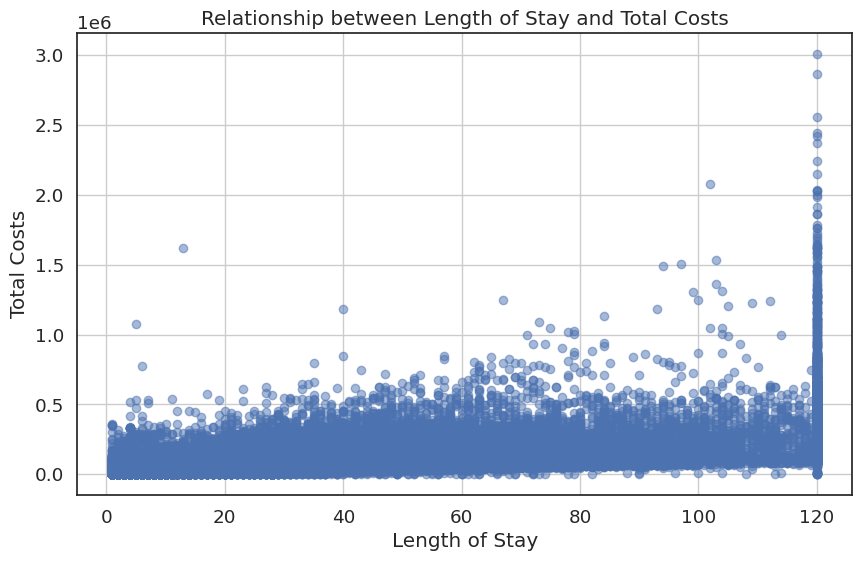

Correlation Coefficient: 0.714206510420712


In [46]:
# Convert 'Length of Stay' column to numerical values if it contains string representations of numbers
cleaned_healthdata['Length of Stay'] = pd.to_numeric(cleaned_healthdata['Length of Stay'], errors='coerce')

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_healthdata['Length of Stay'], cleaned_healthdata['Total Costs'], alpha=0.5)
plt.title('Relationship between Length of Stay and Total Costs')
plt.xlabel('Length of Stay')
plt.ylabel('Total Costs')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
correlation_coefficient = cleaned_healthdata['Length of Stay'].corr(cleaned_healthdata['Total Costs'])
print("Correlation Coefficient:", correlation_coefficient)

**strong positive linear association between the length of stay and total costs**

# **ANOVA - Analysis**

**comparing the average total cost among different length of stay groups (short stay, medium stay, and long stay).**

In [47]:
# Define the groups based on length of stay (you can customize these thresholds)
short_stay_threshold = 3
medium_stay_threshold = 8

# Function to assign patients to groups based on length of stay
def assign_length_of_stay_group(length_of_stay):
    if length_of_stay <= short_stay_threshold:
        return 'Short Stay'
    elif length_of_stay <= medium_stay_threshold:
        return 'Medium Stay'
    else:
        return 'Long Stay'

# Apply the function to create a new column 'Length of Stay Group'
cleaned_healthdata['Length of Stay Group'] = cleaned_healthdata['Length of Stay'].apply(assign_length_of_stay_group)

# Print the 'Length of Stay Group', 'Length of Stay', and 'Total Costs' columns
print(cleaned_healthdata[['Length of Stay Group', 'Length of Stay', 'Total Costs']])


        Length of Stay Group  Length of Stay  Total Costs
0                Medium Stay               4      4818.42
1                Medium Stay               4      4588.78
2                Medium Stay               4      5559.56
3                 Short Stay               2      3567.25
4                 Short Stay               2      3167.89
...                      ...             ...          ...
2346925           Short Stay               2      3391.16
2346926           Short Stay               2      5588.26
2346927           Short Stay               1      2907.62
2346929           Short Stay               1      2447.75
2346930           Short Stay               1      1976.90

[2311006 rows x 3 columns]


<ipython-input-47-4fdcccad6bae>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_healthdata['Length of Stay Group'] = cleaned_healthdata['Length of Stay'].apply(assign_length_of_stay_group)


**Average Total Costs for Short, Medium and Long Stays**

In [48]:
# Calculate the average total cost for each group
average_cost_by_group = cleaned_healthdata.groupby('Length of Stay Group')['Total Costs'].mean()

# Print the average costs for each group
print("Average Total Cost by Length of Stay Group:")
print(average_cost_by_group)


Average Total Cost by Length of Stay Group:
Length of Stay Group
Long Stay      44170.863972
Medium Stay    14354.652421
Short Stay      6929.720617
Name: Total Costs, dtype: float64


**Anova Test**

In [49]:
# Define the length of stay groups
long_stay = cleaned_healthdata[cleaned_healthdata['Length of Stay Group'] == 'Long Stay']['Total Costs']
medium_stay = cleaned_healthdata[cleaned_healthdata['Length of Stay Group'] == 'Medium Stay']['Total Costs']
short_stay = cleaned_healthdata[cleaned_healthdata['Length of Stay Group'] == 'Short Stay']['Total Costs']

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(long_stay, medium_stay, short_stay)

# Print the results
print("ANOVA Test Results:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The null hypothesis is rejected. There is a significant difference in the average total cost among different length of stay groups.")
else:
    print("The null hypothesis is not rejected. There is no significant difference in the average total cost among different length of stay groups.")


ANOVA Test Results:
F-statistic: 308494.7643610451
P-value: 0.0
The null hypothesis is rejected. There is a significant difference in the average total cost among different length of stay groups.


**we can reject the null hypothesis and say that there is a significant difference in the average total costs among the different length of stay groups.**

# **Model Building**

## **Linear Regression Model with Independent variable as length of stay and target variable (total costs)**

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Drop rows with missing values
sample_data = cleaned_healthdata
sample_data_cleaned = sample_data.dropna(subset=['Length of Stay', 'Total Costs'])
# Check if there are any remaining NaN values in the cleaned dataset
print("Number of NaN values after dropping rows:", sample_data_cleaned.isnull().sum().sum())




Number of NaN values after dropping rows: 0


In [51]:
# Extract features (length of stay) and target variable (total costs)
X = sample_data_cleaned[['Length of Stay']].values
y = sample_data_cleaned['Total Costs'].values

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Create and fit the linear regression model using the training data
model = LinearRegression()
model.fit(X_train, y_train)
# Print the coefficients of the model
print("Intercept:", model.intercept_)
print("Coefficient (Length of Stay):", model.coef_[0])

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import mean_squared_error, r2_score

# Calculate mean squared error and R-squared (coefficient of determination)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (Coefficient of Determination):", r2)

Intercept: 1082.185343942565
Coefficient (Length of Stay): 2489.1411404640126
Mean Squared Error: 388410133.0990736
R-squared (Coefficient of Determination): 0.5081383286845418


In [53]:
# Make predictions using the model
# For example, to predict total costs for a length of stay of 5 days:
length_of_stay = 1
predicted_cost = model.predict(np.array([[length_of_stay]]))
print("Predicted Total Costs for Length of Stay of", length_of_stay, "days:", predicted_cost[0])

Predicted Total Costs for Length of Stay of 1 days: 3571.3264844065775


In [54]:
# Make predictions using the model
# For example, to predict total costs for a length of stay of 5 days:
length_of_stay = 2
predicted_cost = model.predict(np.array([[length_of_stay]]))
print("Predicted Total Costs for Length of Stay of", length_of_stay, "days:", predicted_cost[0])

Predicted Total Costs for Length of Stay of 2 days: 6060.46762487059


**There is a positive relation between length of stay and total costs. The total cost would increase for a patient staying longer in the hospital facility.**

## **Multi-linear regression**

In [55]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Define the features (independent variables) and the target (dependent variable)
features = ['Age Group', 'Gender', 'Race', 'APR Severity of Illness Code']
target = 'Total Costs'

# Split the data into features (X) and target (y)
X = sample_data_cleaned[features]
y = sample_data_cleaned[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a pipeline with preprocessing and linear regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict total costs for the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (Coefficient of Determination):", r2)

# Get the coefficients of the linear regression model
coefficients = model.named_steps['regressor'].coef_

# Print coefficients along with feature names
print("\nCoefficients:")
for feature, coef in zip(model.named_steps['preprocessor'].transformers_[1][1]\
                         .named_steps['onehotencoder'].get_feature_names_out(categorical_features),
                         coefficients):
    print(feature, ": ", coef)


Mean Squared Error: 707320410.0145049
R-squared (Coefficient of Determination): 0.10428753171450311

Coefficients:
Age Group_0 to 17 :  8792.234036102911
Age Group_18 to 29 :  -2.3019724055692908e+16
Age Group_30 to 49 :  -2.3019724055692636e+16
Age Group_50 to 69 :  -2.3019724055691976e+16
Age Group_70 or Older :  -2.301972405568986e+16
Gender_F :  -2.30197240556929e+16
Gender_M :  9.930386000246917e+16
Gender_U :  9.930386000247053e+16
Race_Black/African American :  9.930386000246464e+16
Race_Multi-racial :  -1.7054244613265443e+17
Race_Other Race :  -1.7054244613264986e+17
Race_White :  -1.7054244613265325e+17


**The coefficients are insignificant for all the input except one so we can say race, gender to do not contribute to the prediction of total costs.**

## **Linear Regression with Age Group**

In [56]:
from sklearn.preprocessing import OrdinalEncoder
# Define the features and target for each factor
age_features = ['Age Group']
gender_features = ['Gender']
race_features = ['Race']
severity_features = ['APR Severity of Illness Code']

# Function to fit linear regression model and print coefficients
def fit_and_print_coefficients(features, target):
    X = sample_data_cleaned[features]
    y = sample_data_cleaned[target]

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Print coefficients
    print("\nCoefficients for", target, "based on", features[0], ":\n")
    print("Intercept:", model.intercept_)
    print("Coefficient:", model.coef_[0])

     # Print equation
    equation = f"Total Costs = {model.intercept_} + {model.coef_[0]} * {features[0]}"
    print("Equation:",equation)

**There is positive correlation resulting in conclusion that patients with more age will probably lead to more costs for treatment.**

## **Encoding the input categorical features**

**Dropping some of the irrelevant columns**

In [57]:
cleaned_healthdata = cleaned_healthdata.drop(['Zip Code - 3 digits', 'Facility Name', 'CCS Diagnosis Description', 'CCS Procedure Description', 'APR DRG Description', 'APR MDC Description', 'Discharge Year', 'Operating Certificate Number', 'Ethnicity', 'Hospital County', 'Birth Weight'], axis=1)


In [58]:
cleaned_healthdata = cleaned_healthdata.drop(['Patient Disposition'], axis=1) #data leakage feature

**Remaining columns in the dataset for model building**

In [59]:
cleaned_healthdata.columns

Index(['Health Service Area', 'Facility Id', 'Age Group', 'Gender', 'Race',
       'Length of Stay', 'Type of Admission', 'CCS Diagnosis Code',
       'CCS Procedure Code', 'APR DRG Code', 'APR MDC Code',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Payment Typology 1', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs',
       'Length of Stay Group'],
      dtype='object')

**Latest shape of the dataset**

In [60]:
cleaned_healthdata.shape

(2311006, 21)

**Encoding the columns**

In [61]:
mort_string_index = {'Minor': 1, 'Moderate': 2, 'Major': 3, 'Extreme': 4}
age_string_index = {'0 to 17': 1, '18 to 29': 2, '30 to 49': 3, '50 to 69': 4, '70 or Older': 5}

cleaned_healthdata['Age Group'] = cleaned_healthdata['Age Group'].apply(lambda x: age_string_index[x])
cleaned_healthdata['APR Risk of Mortality'] = cleaned_healthdata['APR Risk of Mortality'].apply(lambda x: mort_string_index[x])


In [62]:
encoded_cleaned_healthdata = pd.get_dummies(cleaned_healthdata)
display(encoded_cleaned_healthdata)

,Facility Id,Age Group,Length of Stay,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Total Charges,...,Payment Typology 1_Miscellaneous/Other,Payment Typology 1_Private Health Insurance,Payment Typology 1_Self-Pay,Payment Typology 1_Unknown,Abortion Edit Indicator_N,Emergency Department Indicator_N,Emergency Department Indicator_Y,Length of Stay Group_Long Stay,Length of Stay Group_Medium Stay,Length of Stay Group_Short Stay
0,37.0,5,4,122,0,139,4,2,1,5333.90,...,False,False,False,False,True,False,True,False,True,False
1,37.0,5,4,55,0,422,10,2,2,4865.99,...,False,False,False,False,True,False,True,False,True,False
2,37.0,5,4,122,202,139,4,1,1,5901.54,...,False,False,False,False,True,False,True,False,True,False
3,37.0,4,2,55,0,249,6,2,1,3619.08,...,False,False,False,False,True,False,True,False,False,True
4,37.0,5,2,122,0,139,4,1,2,3185.87,...,False,False,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346925,943.0,5,2,155,0,254,6,3,3,18847.00,...,False,False,False,False,True,False,True,False,False,True
2346926,943.0,5,2,112,0,47,1,2,2,43494.00,...,False,False,False,False,True,False,True,False,False,True
2346927,943.0,4,1,54,159,351,8,1,1,16662.00,...,False,True,False,False,True,False,True,False,False,True
2346929,943.0,5,1,106,0,201,5,1,2,13070.00,...,False,False,False,False,True,False,True,False,False,True


In [63]:
encoded_cleaned_healthdata['Facility Id'] = encoded_cleaned_healthdata['Facility Id'].astype('category')
encoded_cleaned_healthdata['CCS Diagnosis Code'] = encoded_cleaned_healthdata['CCS Diagnosis Code'].astype('category')
encoded_cleaned_healthdata['CCS Procedure Code'] = encoded_cleaned_healthdata['CCS Procedure Code'].astype('category')
encoded_cleaned_healthdata['APR DRG Code'] = encoded_cleaned_healthdata['APR DRG Code'].astype('category')
encoded_cleaned_healthdata['APR MDC Code'] = encoded_cleaned_healthdata['APR MDC Code'].astype('category')
encoded_cleaned_healthdata['APR Severity of Illness Code'] = encoded_cleaned_healthdata['APR Severity of Illness Code'].astype('category')

**Columns in the Encoded dataset for model building**

In [64]:
encoded_cleaned_healthdata.columns

Index(['Facility Id', 'Age Group', 'Length of Stay', 'CCS Diagnosis Code',
       'CCS Procedure Code', 'APR DRG Code', 'APR MDC Code',
       'APR Severity of Illness Code', 'APR Risk of Mortality',
       'Total Charges', 'Total Costs', 'Health Service Area_Capital/Adirond',
       'Health Service Area_Central NY', 'Health Service Area_Finger Lakes',
       'Health Service Area_Hudson Valley', 'Health Service Area_Long Island',
       'Health Service Area_New York City',
       'Health Service Area_Southern Tier', 'Health Service Area_Western NY',
       'Gender_F', 'Gender_M', 'Gender_U', 'Race_Black/African American',
       'Race_Multi-racial', 'Race_Other Race', 'Race_White',
       'Type of Admission_Elective', 'Type of Admission_Emergency',
       'Type of Admission_Newborn', 'Type of Admission_Not Available',
       'Type of Admission_Trauma', 'Type of Admission_Urgent',
       'APR Severity of Illness Description_Extreme',
       'APR Severity of Illness Description_Major',
 

## **Linear Regression Model: Target Variable - Length of Stay and Independent Variable : Shown above**

In [65]:
from sklearn.model_selection import train_test_split

X = encoded_cleaned_healthdata.drop(['Length of Stay','Total Charges','Total Costs'], axis=1) #remove data leakage features
y = encoded_cleaned_healthdata[['Length of Stay']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [66]:
reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
y_round_pred = np.ndarray.round(y_pred)
y_round_train_pred = np.ndarray.round(y_train_pred)
test_acc = accuracy_score(y_test, y_round_pred)
train_acc = accuracy_score(y_train, y_round_train_pred)

print('Mean Square Error_Train', mse_train)
print('Mean Square Error_Test',mse_test)
print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

Mean Square Error_Train 31.651444756277172
Mean Square Error_Test 31.351430786656426
Test accuracy: 0.28508211428785724
Train accuracy: 0.2847968478782274


**The mean squared error (MSE) values on both the test and training datasets are relatively high.**

**The results don't seem to be the best.**

In [67]:
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

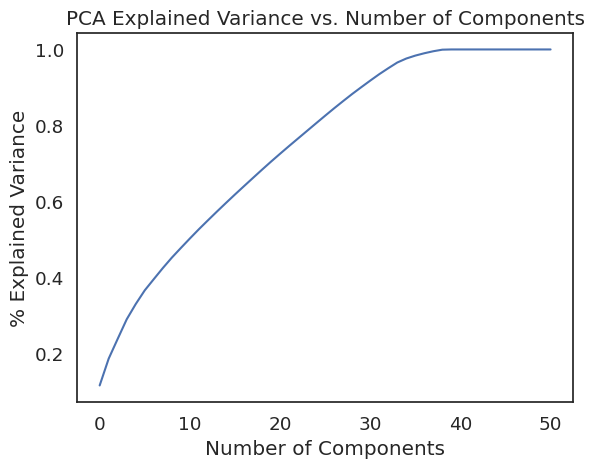

In [68]:
pca1 = PCA()
pca1.fit(x_train)
explained_variance_ratio = pca1.explained_variance_ratio_
pc_vs_variance = np.cumsum(pca1.explained_variance_ratio_)
plt.plot(pc_vs_variance)
plt.xlabel('Number of Components')
plt.ylabel('% Explained Variance')
plt.title('PCA Explained Variance vs. Number of Components')
plt.show()

In [69]:
variance_95 = list(filter(lambda i: i > 0.95, pc_vs_variance))[0]
component_95 = pc_vs_variance.tolist().index(variance_95)
print(component_95)

#perform the dimensionality reduction
pca2 = PCA(n_components=component_95)
x_train = pca2.fit_transform(x_train)
x_test = pca2.transform(x_test)

32


**Relative Feature Importance towards the Length of Stay in Hosital**

In [70]:
pc_df = pd.DataFrame(pca2.components_,columns=X_train.columns)
top_pc = pc_df[0:1]
display(top_pc)


,Facility Id,Age Group,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Health Service Area_Capital/Adirond,Health Service Area_Central NY,...,Payment Typology 1_Miscellaneous/Other,Payment Typology 1_Private Health Insurance,Payment Typology 1_Self-Pay,Payment Typology 1_Unknown,Abortion Edit Indicator_N,Emergency Department Indicator_N,Emergency Department Indicator_Y,Length of Stay Group_Long Stay,Length of Stay Group_Medium Stay,Length of Stay Group_Short Stay
0,-0.0547,0.291579,-0.111776,-0.083395,-0.170594,-0.167391,0.302105,0.30189,0.012607,0.005135,...,-0.009283,-0.095485,-0.018827,0.000269,-0.0,-0.294661,0.294661,0.116386,0.125019,-0.198223


In [71]:
new_top_pc = top_pc.abs()
features = []
for i in range(0,10):
  features.append(new_top_pc.idxmax(axis=1).tolist())
  new_top_pc = new_top_pc.drop(columns=features[i])
print(features)

[['APR Severity of Illness Code'], ['APR Risk of Mortality'], ['Type of Admission_Emergency'], ['Emergency Department Indicator_N'], ['Emergency Department Indicator_Y'], ['Age Group'], ['APR Severity of Illness Description_Minor'], ['Payment Typology 1_Medicare'], ['Type of Admission_Newborn'], ['Length of Stay Group_Short Stay']]


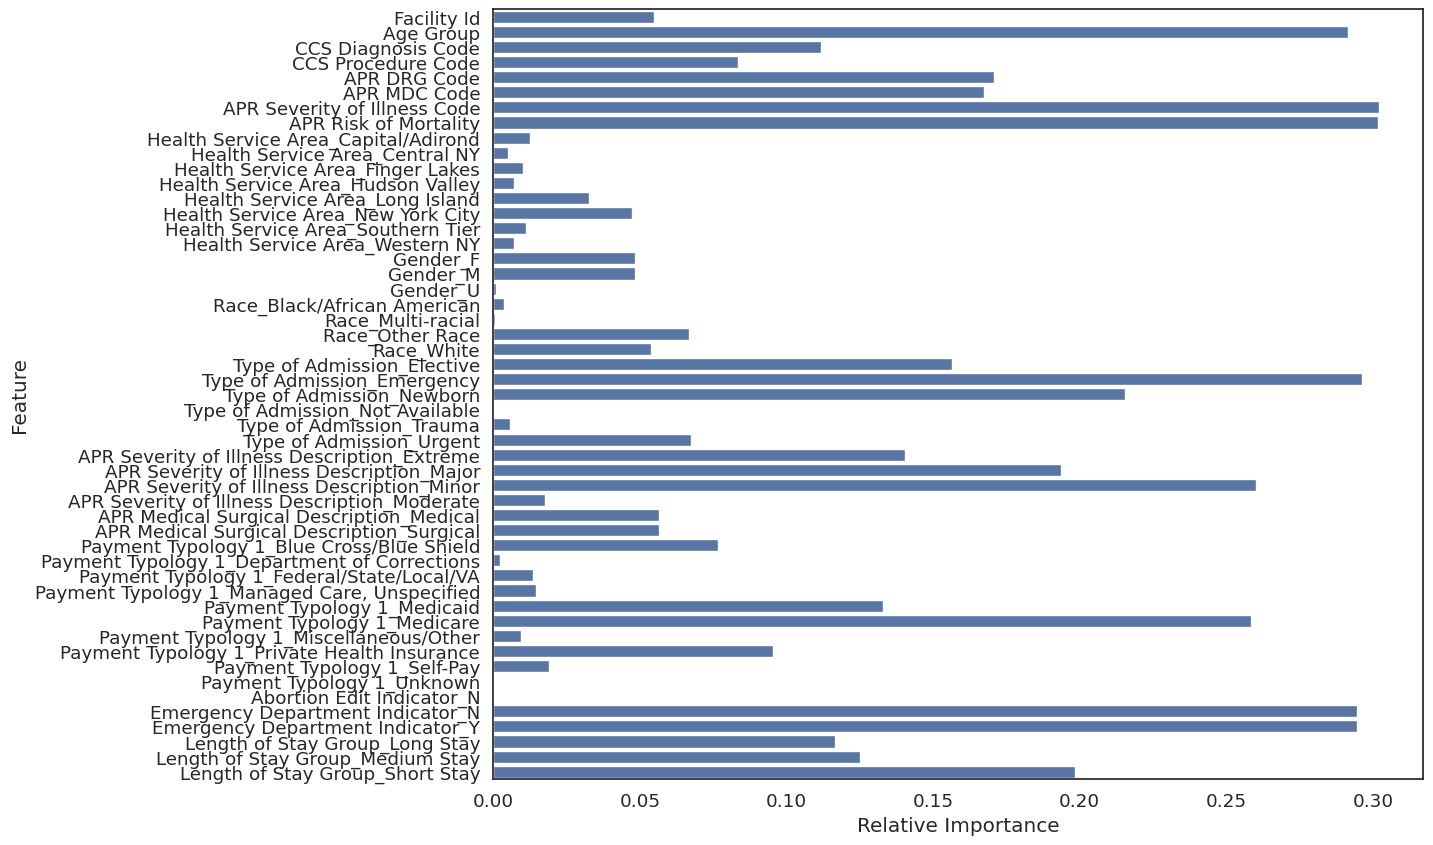

In [72]:
top_pc = top_pc.abs()
list_magnitude = top_pc.loc[0, :].values.tolist()
labels = top_pc.columns.tolist()
feature_importance_df = pd.DataFrame({'Feature': labels, 'Relative Importance': list_magnitude})
#feature_importance_df = feature_importance_df.nlargest(10, 'Relative Importance')

fig, ax =plt.subplots(figsize=(12, 10))  # Adjust figsize to fit the twisted axis
sns.barplot(x='Relative Importance', y='Feature', data=feature_importance_df.reset_index())  # Swap 'Feature' and 'Relative Importance'
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.show()


**Type of Admission, Illness code, Emergency Department Indicator, Payment Typology are important predictors.**

## **Decision Tree**

In [73]:
#Decision Tree - on non-pca data
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [74]:
from sklearn import metrics
train_predictions = dtree.predict(X_train)
test_predictions = dtree.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 0.8799137543085757
Test Accuracy: 0.3771156004165573


**Results seem overfit. Let us tune the hyperparameter to avoid overfitting**

In [75]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth= 10, max_leaf_nodes=150)
dtree.fit(x_train,y_train)

from sklearn import metrics
train_predictions = dtree.predict(x_train)
test_predictions = dtree.predict(x_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 0.37838937160321046
Test Accuracy: 0.376697312282382


## **Encoding the length of stay as bins of 0-5, 5-10,10-20,20-30,30-50,50-120**

In [76]:
bins = [0,5,10,20,30,50,120]
labels = [5,10,20,30,50,120]
encoded_cleaned_healthdata['stay_bin']=pd.cut(x = encoded_cleaned_healthdata['Length of Stay'],bins = bins)
encoded_cleaned_healthdata['stay_label']=pd.cut(x = encoded_cleaned_healthdata['Length of Stay'], bins = bins, labels = labels)
encoded_cleaned_healthdata['stay_bin'] = encoded_cleaned_healthdata['stay_bin'].apply(lambda x: str(x).replace(',',' -'))
encoded_cleaned_healthdata['stay_bin'] = encoded_cleaned_healthdata['stay_bin'].apply(lambda x: str(x).replace('120','120+'))


<ipython-input-77-ed1161d1f78a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stay_bin', data = encoded_cleaned_healthdata, palette='Reds')


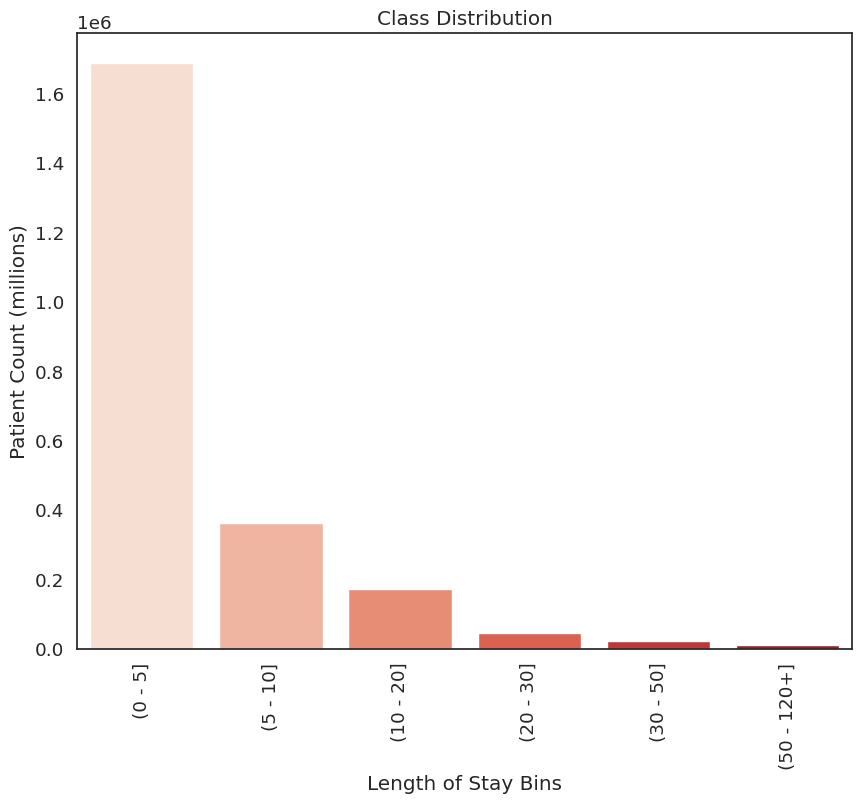

In [77]:
f, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x='stay_bin', data = encoded_cleaned_healthdata, palette='Reds')
plt.xticks(rotation=90)
plt.title('Class Distribution')
plt.xlabel('Length of Stay Bins')
plt.ylabel('Patient Count (millions)')
plt.show()

In [78]:
encoded_cleaned_healthdata.columns

Index(['Facility Id', 'Age Group', 'Length of Stay', 'CCS Diagnosis Code',
       'CCS Procedure Code', 'APR DRG Code', 'APR MDC Code',
       'APR Severity of Illness Code', 'APR Risk of Mortality',
       'Total Charges', 'Total Costs', 'Health Service Area_Capital/Adirond',
       'Health Service Area_Central NY', 'Health Service Area_Finger Lakes',
       'Health Service Area_Hudson Valley', 'Health Service Area_Long Island',
       'Health Service Area_New York City',
       'Health Service Area_Southern Tier', 'Health Service Area_Western NY',
       'Gender_F', 'Gender_M', 'Gender_U', 'Race_Black/African American',
       'Race_Multi-racial', 'Race_Other Race', 'Race_White',
       'Type of Admission_Elective', 'Type of Admission_Emergency',
       'Type of Admission_Newborn', 'Type of Admission_Not Available',
       'Type of Admission_Trauma', 'Type of Admission_Urgent',
       'APR Severity of Illness Description_Extreme',
       'APR Severity of Illness Description_Major',
 

## **Logistic Regression model to predict the length of stay**

In [79]:
X = encoded_cleaned_healthdata.drop(['Length of Stay','Total Charges','Total Costs','stay_bin','stay_label'], axis=1)
y = encoded_cleaned_healthdata[['stay_label']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

pca = PCA(n_components=32)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [80]:
#logisitic regression without class balancing
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class='ovr').fit(x_train, y_train)
y_train_pred = log_reg.predict(x_train)
y_pred = log_reg.predict(x_test)

test_acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, y_train_pred)

print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test accuracy: 0.8094726396289063
Train accuracy: 0.8086281544707808


In [81]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           5       0.90      0.94      0.92    507036
          10       0.52      0.28      0.36    109302
          20       0.50      1.00      0.67     52256
          30       1.00      0.00      0.00     14080
          50       0.00      0.00      0.00      6905
         120       0.69      0.01      0.03      3723

    accuracy                           0.81    693302
   macro avg       0.60      0.37      0.33    693302
weighted avg       0.80      0.81      0.78    693302



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


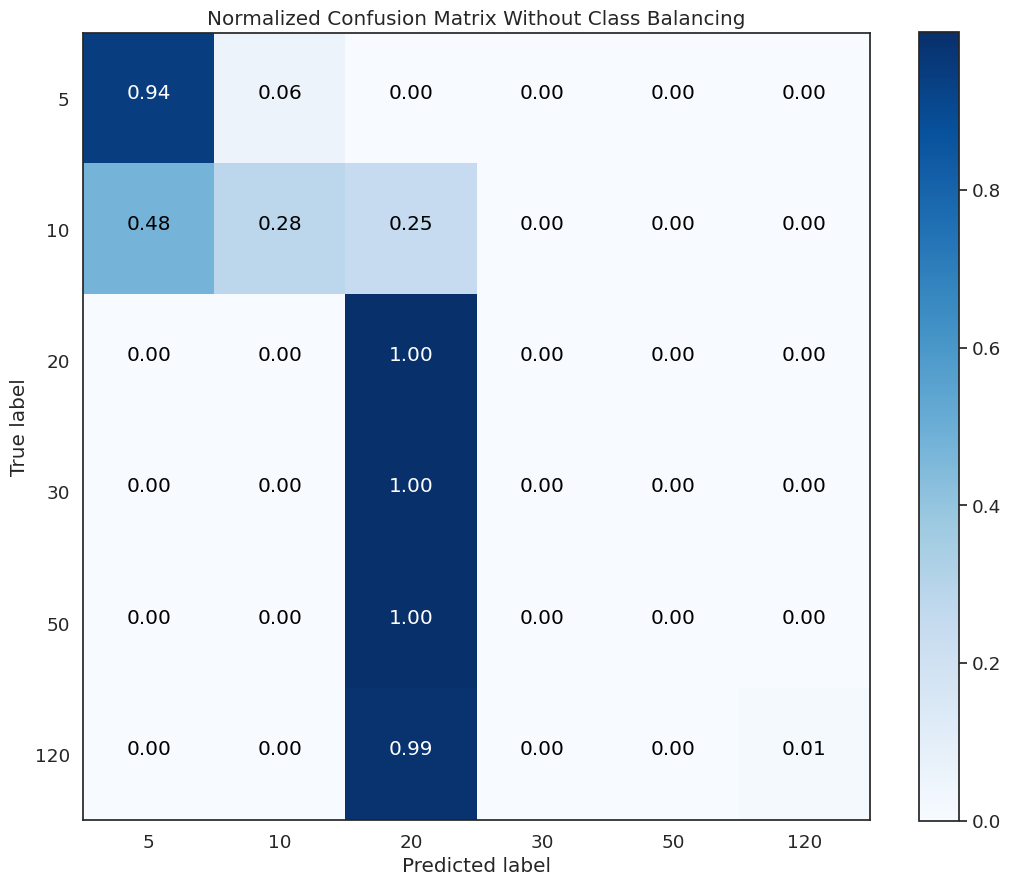

In [82]:
# Assuming `log_reg` is your trained logistic regression model
# and `x_test`, `y_test` are your test data
y_pred = log_reg.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize confusion matrix

plt.figure(figsize=(11, 9))
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix Without Class Balancing')
plt.colorbar()

# Add labels to the plot
classes = log_reg.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add numerical values to the plot
fmt = '.2f'
thresh = cm_normalized.max() / 2.
for i, j in itertools.product(range(cm_normalized.shape[0]), range(cm_normalized.shape[1])):
    plt.text(j, i, format(cm_normalized[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm_normalized[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [83]:
#logistic regression - works better with standardized but no PCA performed on data

log_reg = LogisticRegression(class_weight='balanced', multi_class='ovr').fit(x_train, y_train)
y_train_pred = log_reg.predict(x_train)
y_pred = log_reg.predict(x_test)

test_acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, y_train_pred)

print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test accuracy: 0.7583434059039207
Train accuracy: 0.7578611414696385


In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           5       0.99      0.79      0.88    507036
          10       0.42      0.72      0.53    109302
          20       0.52      0.86      0.64     52256
          30       0.27      0.07      0.12     14080
          50       0.15      0.16      0.15      6905
         120       0.14      0.23      0.17      3723

    accuracy                           0.76    693302
   macro avg       0.41      0.47      0.42    693302
weighted avg       0.84      0.76      0.78    693302



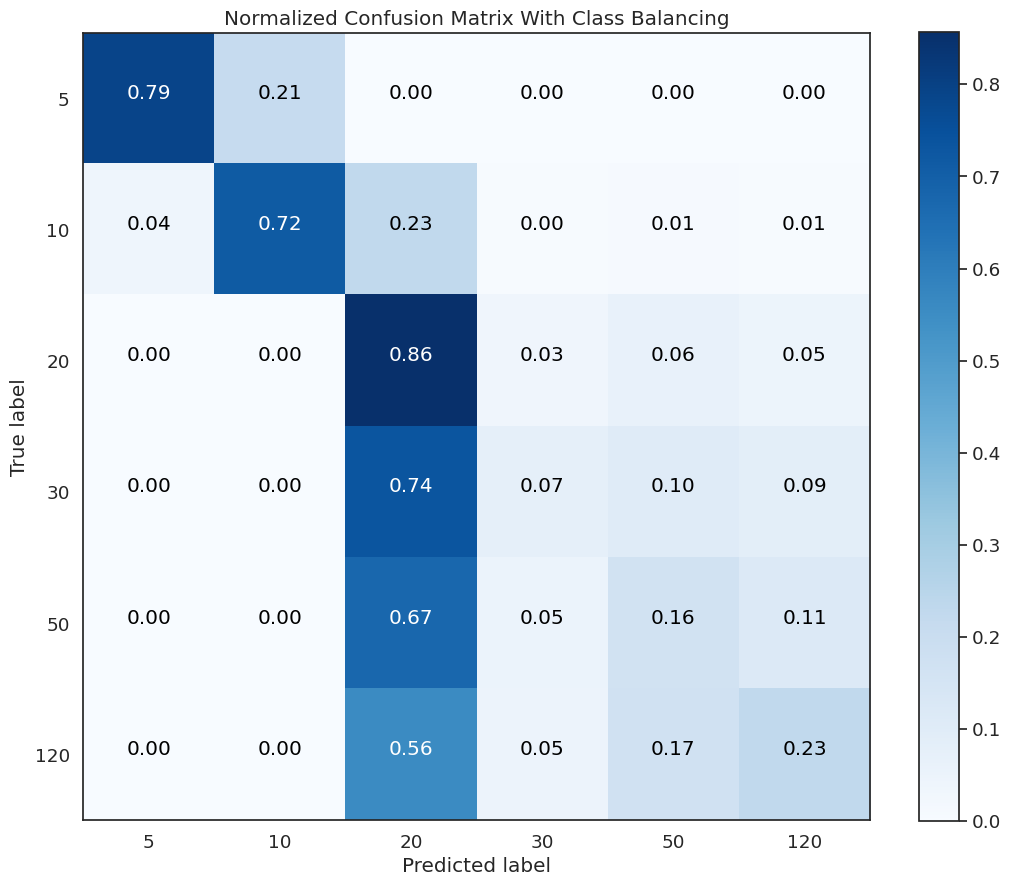

In [85]:

# Assuming `log_reg` is your trained logistic regression model
# and `x_test`, `y_test` are your test data
y_pred = log_reg.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize confusion matrix

plt.figure(figsize=(11, 9))
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix With Class Balancing')
plt.colorbar()

# Add labels to the plot
classes = log_reg.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add numerical values to the plot
fmt = '.2f'
thresh = cm_normalized.max() / 2.
for i, j in itertools.product(range(cm_normalized.shape[0]), range(cm_normalized.shape[1])):
    plt.text(j, i, format(cm_normalized[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm_normalized[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [86]:

dtree=DecisionTreeClassifier(class_weight='balanced')
dtree.fit(X_train,y_train)

from sklearn import metrics
train_predictions = dtree.predict(X_train)
test_predictions = dtree.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))


Train Accuracy: 0.9658213121807203
Test Accuracy: 0.7840955312403541
